# Udacity Project 4 - Wrangle and Analyse "WeRateDogs" Twitter Page

# Introduction 

# Wrangle and Analyse of the Data

In [674]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
import time

# Gather

In [675]:
archive = pd.read_csv('twitter_archive_enhanced.csv')
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [676]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [677]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content) 
image_predictions = pd.read_csv('image-predictions.tsv', sep ='\t')

In [678]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [679]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [680]:
image_predictions.shape

(2075, 12)

**Unfortunately, I still cannot get my developer account. It has been pending for a week now and I have not received any news about it. I have contacted them halfway through and that did not fix the problem. I run this code as a Markdown just so that the program wont get stuck when running all the codes and doesnt cause any trouble in the future.**

In [681]:
# read tweet-json.txt and append each tweet to tweets list

tweets = []
for line in open('tweet_json.txt', 'r'):
     tweets.append(json.loads(line))

# print first element to see available info
print(tweets[0])

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}, 'extended_entities': {'media

In [682]:
#save wanted columns to a dataframe

tweet_list =[]
for element in tweets:
        tweet_id = element['id']
        favorites = element['favorite_count']
        retweets = element['retweet_count']
        followers = element['user']['followers_count']
        if element['retweeted'] == False:
            retweeted_status = "Original tweet"
        else:
            retweeted_status = "Retweet"
        
            
        tweet_list.append({'id': str(tweet_id),
                             'favorites': int(favorites),
                             'retweets': int(retweets),
                             'followers': int(followers),
                             'retweeted_status': retweeted_status,
                            })
        
        tweet_df = pd.DataFrame(tweet_list, columns = ['id', 'favorites','retweets',
                                                       'followers', 'retweeted_status'])

In [683]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                  2354 non-null object
favorites           2354 non-null int64
retweets            2354 non-null int64
followers           2354 non-null int64
retweeted_status    2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [684]:
tweet_df.head()

,id,favorites,retweets,followers,retweeted_status
0,892420643555336193,39467,8853,3200889,Original tweet
1,892177421306343426,33819,6514,3200889,Original tweet
2,891815181378084864,25461,4328,3200889,Original tweet
3,891689557279858688,42908,8964,3200889,Original tweet
4,891327558926688256,41048,9774,3200889,Original tweet


# Access the Data

In [685]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [686]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
id                  2354 non-null object
favorites           2354 non-null int64
retweets            2354 non-null int64
followers           2354 non-null int64
retweeted_status    2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [687]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [688]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [689]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [690]:
print(archive.duplicated().sum())
print(tweet_df.duplicated().sum())
print(image_predictions.duplicated().sum())
print(image_predictions.jpg_url.duplicated().sum()) # repeated images

0
0
0
66


In [691]:
djpg = image_predictions.jpg_url.duplicated()
djpg.value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

**Issues**

Quality:

- 1) Remove retweets columns and rows from the data. They are essentially duplicates of tweets
- 2) Further remove any columns and rows that are related to retweets
- 3) Remove 66 duplicated 'jpg_url' in the 'image_predictions' file 
- 4) Timestamp is classified as an 'object' instead of 'datetime'
- 5) In archive, the Source column needs work as it is hard to understand the data 
- 6) Incorrect values in rating numerators 
- 7) Image_predictions has a column p1 that has '_' inbetween word. Can be removed
- 8) In archive, some of the dog names are 'None' or written with mistake (a, the, 0, etc)

Tidiness: 

- 9) The 'stage' of the dog (puppo, pupper, floofer, doggo) can be modified.
- 10) Merge the the data sets because they are all related to Tweets variable (would make sense)
- 11) Remove columns that do not match in amount and if the column is not 'useful'

# Cleaning the Data Sets

**Because I experienced some of my data being deleted before (when I was doing the project for the first time), I am making a copy out of all the data sets since it is proven to be working** 

In [692]:
new_arc = archive.copy()
new_image = image_predictions.copy()
new_tweet = tweet_df.copy()

**(Quality) Issue 1**

**Define**

Remove retweets columns and rows from the data.

**Code**

In [693]:
new_arc = new_arc.drop(columns = ['retweeted_status_id'])

**Test**

In [694]:
new_arc.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Issues 2**

**Define**

Further remove related retweets columns and rows because some of them have NaN values and overal can be considered as duplicates of tweets. 

**Code**

In [695]:
new_arc = new_arc.drop(columns = ['in_reply_to_status_id',
                              'in_reply_to_user_id',
                              'retweeted_status_user_id',
                              'retweeted_status_timestamp',
                              'expanded_urls'])

**Test**

In [696]:
new_arc.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,None,None,None


**Issue 3**

**Define**

Remove 66 duplicated 'jpg_ulr' files in the 'image_predictions'.

**Code**


In [697]:
new_image = new_image.drop_duplicates(subset=['jpg_url'])

**Test**

In [698]:
print(new_image.jpg_url.duplicated().sum())

0


**Issue 4**


**Define**

Make timestamp into a datetime type.

**Code**


In [699]:
from datetime import datetime

new_arc['timestamp'] = pd.to_datetime(new_arc['timestamp'])

**Test**

In [700]:
new_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


**Issue 5**

**Define**

The source column has the letter 'herf' in front of every source. Better to remove it. 

**Code**


In [701]:
#See the full source row
new_arc['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [702]:
new_arc['source'] = new_arc['source'].str.replace('<a href="', '').str.replace('" rel=', '').str.replace('</a>', '').str.replace('>', '')
new_arc['source'] = new_arc['source'].str.split('"')

In [703]:
href = []
for i in new_arc['source']:     
    href.append(i[0])

In [704]:
new_arc['source'] = href

**Test**

In [705]:
new_arc['source'][0]

'http://twitter.com/download/iphone'

**Issue 6**

**Define**

The Rating Numerator is not properly defined, plus some numerator values are written by mistake in the 'text' column. 

**Code**


In [706]:
new_arc.loc[new_arc['tweet_id'] == 786709082849828864]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,2016-10-13 23:23:56+00:00,http://twitter.com/download/iphone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,None


In [707]:
ratings = new_arc.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
ratings.head()

,0,1
0,13,10
1,13,10
2,12,10
3,13,10
4,12,10


In [708]:
new_arc.rating_numerator = ratings

In [709]:
new_arc.rating_numerator.astype(float)

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2351     5.0
2352     6.0
2353     9.0
2354     7.0
2355     8.0
Name: rating_numerator, Length: 2356, dtype: float64

**Test**

In [710]:
new_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


**Issue 7**

**Define**

Remove '_' to make the data more attractive

**Code**


In [711]:
new_image['p1'] = new_image['p1'].str.replace('_', ' ')
new_image['p2'] = new_image['p2'].str.replace('_', ' ')
new_image['p3'] = new_image['p3'].str.replace('_', ' ')

**Test**

In [712]:
new_image.p1[:10]

0    Welsh springer spaniel
1                   redbone
2           German shepherd
3       Rhodesian ridgeback
4        miniature pinscher
5      Bernese mountain dog
6                box turtle
7                      chow
8             shopping cart
9          miniature poodle
Name: p1, dtype: object

In [713]:
new_image.p2[:10]

0                collie
1    miniature pinscher
2              malinois
3               redbone
4            Rottweiler
5      English springer
6            mud turtle
7       Tibetan mastiff
8       shopping basket
9              komondor
Name: p2, dtype: object

In [714]:
new_image.p3[:10]

0              Shetland sheepdog
1            Rhodesian ridgeback
2                     bloodhound
3             miniature pinscher
4                       Doberman
5     Greater Swiss Mountain dog
6                       terrapin
7                       fur coat
8               golden retriever
9    soft-coated wheaten terrier
Name: p3, dtype: object

**Issue 8**

**Define**

Some dog names are written as 'None', 'by', 'this', 'old', 'getting', 'not', 'a', 'such', etc. There could be way more name that are not written correctly. Therefore, it would be better to test the problem with 'lowercase' names to see what comes out. 

**Code**


In [715]:
for col in list(new_arc):
    print(col)
    print(new_arc[col].unique())
#Still to hard to say if we are missing anything

tweet_id
[892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149]
timestamp
<DatetimeArray>
['2017-08-01 16:23:56+00:00', '2017-08-01 00:17:27+00:00',
 '2017-07-31 00:18:03+00:00', '2017-07-30 15:58:51+00:00',
 '2017-07-29 16:00:24+00:00', '2017-07-29 00:08:17+00:00',
 '2017-07-28 16:27:12+00:00', '2017-07-28 00:22:40+00:00',
 '2017-07-27 16:25:51+00:00', '2017-07-26 15:59:51+00:00',
 ...
 '2015-11-16 01:01:59+00:00', '2015-11-16 00:55:59+00:00',
 '2015-11-16 00:49:46+00:00', '2015-11-16 00:35:11+00:00',
 '2015-11-16 00:30:50+00:00', '2015-11-16 00:24:50+00:00',
 '2015-11-16 00:04:52+00:00', '2015-11-15 23:21:54+00:00',
 '2015-11-15 23:05:30+00:00', '2015-11-15 22:32:08+00:00']
Length: 2356, dtype: datetime64[ns, UTC]
source
['http://twitter.com/download/iphone' 'http://twitter.com'
 'http://vine.co' 'https://about.twitter.com/products/tweetdeck']
text
["This is Phineas. He's a mystical boy. Only ever appears in the hole o

In [716]:
bad_names = []
for name in new_arc['name']:
    if name.islower():
        bad_names.append(name)
        
#So what was the actual list of all the incorrect dog names? 
print(bad_names)

['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly', 'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


In [717]:
for name in new_arc['name']:
    if name in bad_names:
        new_arc['name'].replace(name, 'None', inplace=True)


**Test**

In [718]:
for name in new_arc['name']:
    if name.islower():
        print(name)

**(Tidiness) Issue 9**

**Define**

Upgrade the Dogs Type columns

**Code**


In [719]:
#Shows the number of possible rows and the count of values inside
new_arc.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [720]:
new_arc.doggo.replace('None', '', inplace=True)
new_arc.doggo.replace(np.NaN, '', inplace=True) 
new_arc.floofer.replace('None', '', inplace=True)
new_arc.floofer.replace(np.NaN, '', inplace=True) 
new_arc.pupper.replace('None', '', inplace=True)
new_arc.pupper.replace(np.NaN, '', inplace=True) 
new_arc.puppo.replace('None', '', inplace=True)
new_arc.puppo.replace(np.NaN, '', inplace=True) 

In [721]:
new_arc['stage'] = new_arc.doggo + new_arc.floofer + new_arc.pupper + new_arc.puppo
new_arc.loc[new_arc.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
new_arc.loc[new_arc.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
new_arc.loc[new_arc.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

**Test**

In [722]:
new_arc.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,


In [723]:
new_arc.stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

**Issue 10**

**Define Pt1**

The tweet_id is present along the three data sets, but some of them are object and some are integer. In order to do a proper merger, the data sets should have the same type of tweets first. 

**Code**


In [724]:
new_arc['tweet_id'] = new_arc['tweet_id'].astype(str)
new_image['tweet_id'] = new_image['tweet_id'].astype(str)

I have also noticed that the column of tweet_id does not have the same name in 'new_tweet' as that column is named just id. Need to change that to tweet_id.

In [725]:
new_tweet.rename(columns = {'id':'tweet_id'}, inplace = True)

**Test**

In [726]:
new_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
stage                 2356 non-null object
dtypes: datetime64[ns, UTC](1), int64(1), object(10)
memory usage: 221.0+ KB


In [727]:
new_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


In [728]:
new_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id            2354 non-null object
favorites           2354 non-null int64
retweets            2354 non-null int64
followers           2354 non-null int64
retweeted_status    2354 non-null object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


**Define Pt2**

Now,to combine all the modified data sets to get a better and more efficient perspective.

**Code**


In [729]:
total_data1= pd.merge(new_arc, new_image, how= 'left', on = ['tweet_id'])
total_data = pd.merge(total_data1, new_tweet, how ='left', on = ['tweet_id'])

**Test**

In [730]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
stage                 2356 non-null object
jpg_url               2009 non-null object
img_num               2009 non-null float64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null object
p2                    2009 non-null object
p2_conf               2009 non-null float64
p2_dog                2009 non-null object
p3                

**Issue 11**

**Define**

Now that the data sets have been combined, we need to further polish it to make it all clean and equal. Luckily, the only cleaning is dropping the columns that do not match with the rest of the data (image_num - p3_dog). I keep the jpg_url for the picture as they might be usefull. 

**Code**

In [731]:
total_data = total_data.drop(['img_num', 'p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 'p3_conf', 'p3_dog'], axis =1)

**Test**

In [732]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null datetime64[ns, UTC]
source                2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null object
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
stage                 2356 non-null object
jpg_url               2009 non-null object
p1                    2009 non-null object
p2                    2009 non-null object
p3                    2009 non-null object
favorites             2354 non-null float64
retweets              2354 non-null float64
followers             2354 non-null float64
retweeted_status      2354 non-null object
dtypes: datetime64

In [733]:
total_data.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage,jpg_url,p1,p2,p3,favorites,retweets,followers,retweeted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,bagel,banana,39467.0,8853.0,3200889.0,Original tweet
1,892177421306343426,2017-08-01 00:17:27+00:00,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,33819.0,6514.0,3200889.0,Original tweet
2,891815181378084864,2017-07-31 00:18:03+00:00,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,25461.0,4328.0,3200889.0,Original tweet
3,891689557279858688,2017-07-30 15:58:51+00:00,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper towel,Labrador retriever,spatula,42908.0,8964.0,3200889.0,Original tweet
4,891327558926688256,2017-07-29 16:00:24+00:00,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English springer,German short-haired pointer,41048.0,9774.0,3200889.0,Original tweet
5,891087950875897856,2017-07-29 00:08:17+00:00,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,13,10,None,,,,,,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake Bay retriever,Irish terrier,Indian elephant,20562.0,3261.0,3200889.0,Original tweet
6,890971913173991426,2017-07-28 16:27:12+00:00,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,Border collie,ice lolly,12041.0,2158.0,3200889.0,Original tweet
7,890729181411237888,2017-07-28 00:22:40+00:00,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,13,10,None,,,,,,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,Eskimo dog,Pembroke,56848.0,16716.0,3200889.0,Original tweet
8,890609185150312448,2017-07-27 16:25:51+00:00,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,,,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish terrier,Irish setter,Chesapeake Bay retriever,28226.0,4429.0,3200889.0,Original tweet
9,890240255349198849,2017-07-26 15:59:51+00:00,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,Cardigan,Chihuahua,32467.0,7711.0,3200889.0,Original tweet


In [734]:
#Extracting the polished data into a file. 

total_data.to_csv('twitter_archive_master.csv')

# Analysing and Visualization of Data

**3 Insights and 1 Visual**
- Most favorite Tweet?
- Highest retweeted tweet? 
- Top 10 most common dog breeds in the whole data ? (Illustrated by the visual as well)
- Number of Retweets vs Favorites? (Illustrated by the visual as well)

**Most favorite Tweet?**

In [735]:
#Highest Favorite Tweet
total_data.sort_values('favorites', ascending = False)[['tweet_id','favorites']]

,tweet_id,favorites
413,822872901745569793,132810.0
1039,744234799360020481,131075.0
66,879415818425184262,107956.0
534,807106840509214720,107015.0
135,866450705531457537,106827.0
...,...,...
476,816014286006976512,0.0
475,816062466425819140,0.0
868,761750502866649088,0.0
19,888202515573088257,NaN


In [736]:
total_data.iloc[413]

tweet_id                                             822872901745569793
timestamp                                     2017-01-21 18:26:02+00:00
source                               http://twitter.com/download/iphone
text                  Here's a super supportive puppo participating ...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                                  
floofer                                                                
pupper                                                                 
puppo                                                             puppo
stage                                                             puppo
jpg_url                 https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
p1                                                     Lakeland 

From table above we can see that the dog with the most favorites is **132810** that belongs to a puppo. 

**Highest retweeted tweet?**

In [737]:
#Highest Retweeted Tweet
total_data.sort_values('retweets', ascending = False)[['tweet_id','retweets']]

,tweet_id,retweets
1039,744234799360020481,79515.0
260,842892208864923648,56625.0
534,807106840509214720,56625.0
818,770743923962707968,52360.0
1079,739238157791694849,52360.0
...,...,...
274,840698636975636481,3.0
1295,707983188426153984,2.0
291,838085839343206401,0.0
19,888202515573088257,NaN


In [738]:
total_data.iloc[1039]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
source                               http://twitter.com/download/iphone
text                  Here's a doggo realizing you can stand in a po...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                               None
doggo                                                             doggo
floofer                                                                
pupper                                                                 
puppo                                                                  
stage                                                             doggo
jpg_url               https://pbs.twimg.com/ext_tw_video_thumb/74423...
p1                                                   Labrador re

From this table, we can see that the highest retweet belongs to doggo with **79515**.

**Top 10 most common dog breeds in the whole data ? (Illustrated by the visual as well)**

In [739]:
#Most common dog type
total_data.p1.value_counts()

golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
pug                    55
                     ... 
water buffalo           1
tick                    1
remote control          1
African crocodile       1
dining table            1
Name: p1, Length: 378, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

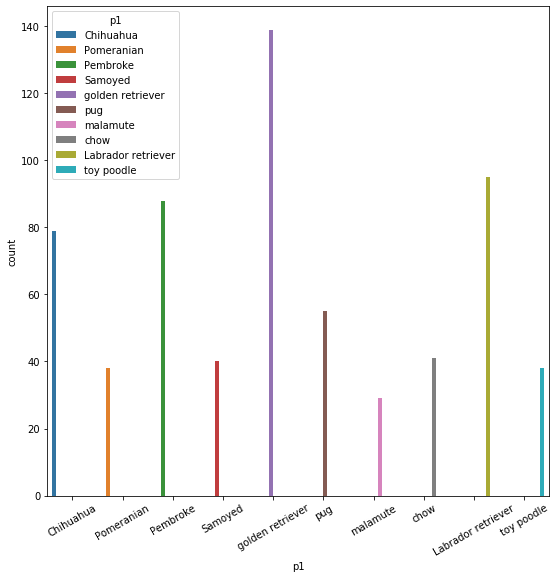

In [740]:
#Most common dog type
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=[9,9])
dt = total_data.groupby('p1').filter(lambda x: len(x) > 27)
sb.countplot(data= dt, x= 'p1', hue='p1')
plt.xticks(rotation=30)

From the plot, the most common dog is Golden Retriever followed by Labrador Retriever. 

**Number of Retweets vs Favorites**

Text(0.5, 1.0, 'Retweets vs Favorites')

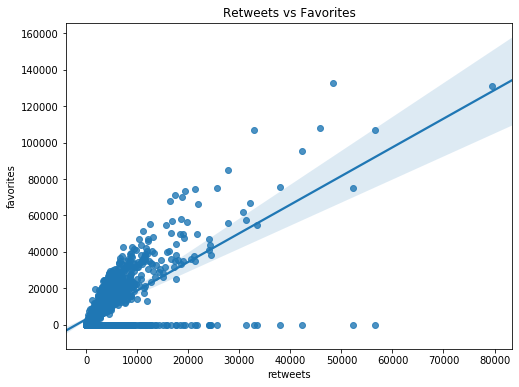

In [741]:
plt.figure(figsize = [8, 6])
sb.regplot(data = total_data, x = 'retweets', y = 'favorites');
plt.title('Retweets vs Favorites')